<a href="https://colab.research.google.com/github/shikha2209/creditcard/blob/main/playstore_analysis_v0_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [ ]:
data=pd.read_csv('/content/playstore-analysis (2) (1).csv')

In [ ]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
data.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9500.000000,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19000.000000,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [ ]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# **Task:1 Data clean up – Missing value treatment**


In [ ]:
#a).Drop records where rating is missing since rating is our target/study variable
data.dropna(how='any', subset=['Rating'], axis=0, inplace = True)

In [ ]:
data.Rating.isnull().sum()

0

In [ ]:
#b. Check the null values for the Android Ver column. 
#i. Are all 3 records having the same problem?
data.loc[data['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Yes, all 3 records are having same problem ie all are NaN.

In [ ]:
#ii.Drop the 3rd record i.e. record for “Life Made WIFI …"
data.drop([10472], inplace = True)

In [ ]:
data.loc[data['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


In [ ]:
data['Android Ver'].fillna(data['Android Ver'].mode()[0], inplace=True)


In [ ]:
data['Current Ver'].fillna(data['Current Ver'].mode()[0], inplace=True)

# **Task: 2. Data clean up – correcting the data types**

In [ ]:
#a. Which all variables need to be brought to numeric types?
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


Reviews and installs need to be brought to numeric types.

In [ ]:
#b. Price variable – remove $ sign and convert to float
price = []
for i in data ['Price']:
    if i[0]=='$':
        price.append(i[1:])
    else:
        price.append(i) 

In [ ]:
data.drop(labels=data[data['Price']=='Everyone'].index, inplace = True)
data['Price']= price
data['Price']= data['Price'].astype('float')

In [ ]:
#c. Installs – remove ‘,’ and ‘+’ sign, convert to integer
install = []
for j in data['Installs']:
    install.append(j.replace(',','').replace('+','').strip())

data['Installs']= install
data['Installs']= data['Installs'].astype('int')

In [ ]:
#d. Convert all other identified columns to numeric
data['Reviews']= data['Reviews'].astype('int')

# ** Task 3. Sanity checks – check for the following and handle accordingly**

In [ ]:
#i. Are there any such records? Drop if so
data.loc[data.Rating < 1] & data.loc[data.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


There are no such records with rating less than 1 or greater than 5.

In [ ]:
#b. Reviews should not be more than installs as only those who installed can review the app.
#i. Are there any such records? Drop if so.


In [ ]:
data.loc[data['Reviews'] > data['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.000000,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


Yes, there are 7 records where Review is greater than Installs.

In [ ]:
temp = data[data['Reviews']>data['Installs']].index
data.drop(labels=temp, inplace=True)

In [ ]:
data.loc[data['Reviews'] > data['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


# **Task 4. Identify and handle outliers –**

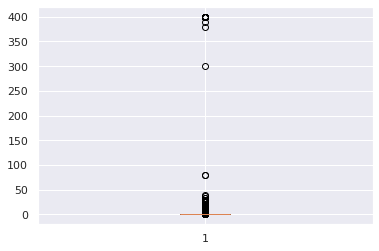

In [ ]:
#a. Price column
#i. Make suitable plot to identify outliers in price
plt.boxplot(data['Price'])
plt.show()

In [ ]:
#ii.Do you expect apps on the play store to cost $200? Check out these cases
print('Yes we can expect apps on the play store to cost $200')
data.loc[data['Price'] > 200]

Yes we can expect apps on the play store to cost $200


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


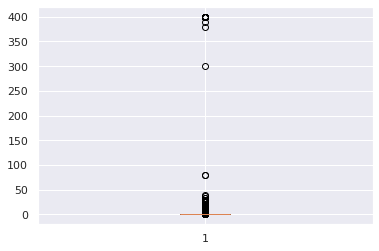

In [ ]:
#iii. After dropping the useless records, make the suitable plot again to identify outliers
plt.boxplot(data['Price'])
plt.show()

In [ ]:
#iv. Limit data to records with price < $30
gt_30 = data[data['Price'] > 30].index
data.drop(labels=gt_30, inplace=True)

In [ ]:
count = data.loc[data['Price'] > 30].index
count.value_counts().sum()

0

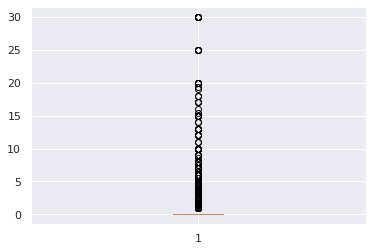

In [ ]:
#outliers
plt.boxplot(data['Price'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


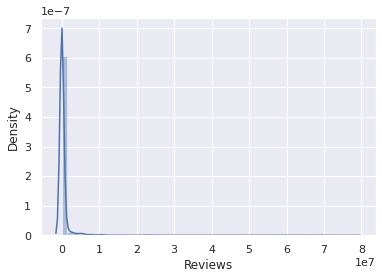

In [ ]:
#b. Reviews column
#i. Make suitable plot
sns.distplot(data['Reviews'])
plt.show()

In [ ]:
#ii. Limit data to apps with < 1 Million reviews
gt_1m = data[data['Reviews'] > 1000000 ].index
data.drop(labels = gt_1m, inplace=True)
print(gt_1m.value_counts().sum(),'cols dropped')

704 cols dropped


In [ ]:
#c. Installs
#i. What is the 95th percentile of the installs?
percentile = data.Installs.quantile(0.95) #95th Percentile of Installs
print(percentile,"is 95th percentile of Installs")

10000000.0 is 95th percentile of Installs


In [ ]:
#ii.Drop records having a value more than the 95th percentile
for i in range(0,101,1):
    print(' the {} percentile of installs is {} '.format(i,np.percentile(data['Installs'],i)))

 the 0 percentile of installs is 5.0 
 the 1 percentile of installs is 50.0 
 the 2 percentile of installs is 100.0 
 the 3 percentile of installs is 100.0 
 the 4 percentile of installs is 100.0 
 the 5 percentile of installs is 100.0 
 the 6 percentile of installs is 500.0 
 the 7 percentile of installs is 500.0 
 the 8 percentile of installs is 1000.0 
 the 9 percentile of installs is 1000.0 
 the 10 percentile of installs is 1000.0 
 the 11 percentile of installs is 1000.0 
 the 12 percentile of installs is 1000.0 
 the 13 percentile of installs is 1000.0 
 the 14 percentile of installs is 1000.0 
 the 15 percentile of installs is 1000.0 
 the 16 percentile of installs is 5000.0 
 the 17 percentile of installs is 5000.0 
 the 18 percentile of installs is 5000.0 
 the 19 percentile of installs is 5000.0 
 the 20 percentile of installs is 5000.0 
 the 21 percentile of installs is 10000.0 
 the 22 percentile of installs is 10000.0 
 the 23 percentile of installs is 10000.0 
 the 24 pe

In [ ]:
temp1 = data[data["Installs"] > percentile].index
data.drop(labels = temp1, inplace = True)
print(temp1.value_counts().sum())#,'cols dropped')

199


# #**Data analysis to answer business questions**
## **Task 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


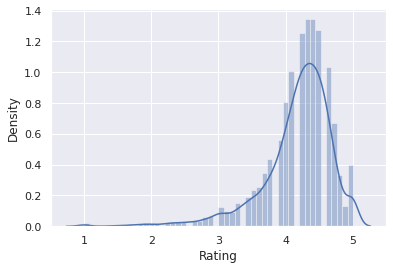

The skewness of this distribution is -1.7434270330647985
The Median of this distribution 4.3 is greater than mean 4.170800237107298 of this distribution


In [ ]:
#a. How do you explain this?
sns.distplot(data['Rating'])
plt.show()
print('The skewness of this distribution is',data['Rating'].skew())
print('The Median of this distribution {} is greater than mean {} of this distribution'.format(data.Rating.median(),data.Rating.mean()))

In [ ]:
#b. What is the implication of this on your analysis?
data['Rating'].mode()

0    4.3
dtype: float64

Since mode>= median > mean, the distribution of Rating is Negatively Skewed.Therefore distribution of Rating is more Skewed towards lower values.

In [ ]:
#6. What are the top Content Rating values?
#a. Are there any values with very few records?
data['Content Rating'].value_counts()

Everyone           6782
Teen                900
Mature 17+          417
Everyone 10+        332
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

Adults only 18+ and Unrated are values with very few records so we drop them.

In [ ]:
#b. If yes, drop those as they won’t help in the analysis
#Replacing unwanted values with NaN
cr = []
for k in data['Content Rating']:
    cr.append(k.replace('Adults only 18+','NaN').replace('Unrated','NaN'))

data['Content Rating']=cr

In [ ]:
# Droping the NaN values.
temp2 = data[data["Content Rating"] == 'NaN'].index
data.drop(labels=temp2, inplace=True)
print('droped cols',temp2)

droped cols Int64Index([298, 3043, 6424, 8266], dtype='int64')


In [ ]:
data['Content Rating'].value_counts() # Just  Check

Everyone        6782
Teen             900
Mature 17+       417
Everyone 10+     332
Name: Content Rating, dtype: int64

# **Task 7. Effect of size on rating**

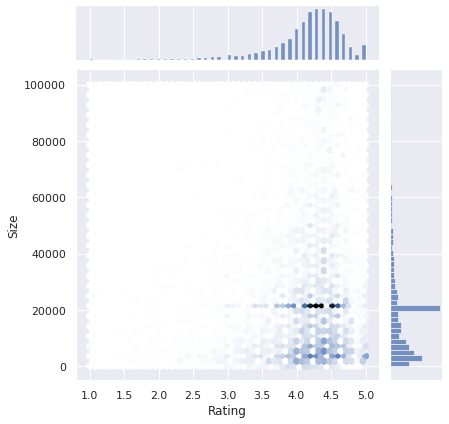

In [ ]:
#a. Make a joinplot to understand the effect of size on rating
sns.jointplot(y ='Size', x ='Rating', data = data, kind ='hex')
plt.show()

In [ ]:
#b. Do you see any patterns?

Yes, patterns can be observed between Size and Rating ie. their is correlation between Size and Rating.

In [ ]:
#c. How do you explain the pattern?


Generally on increasing Rating, Size of App also increases. But this is not always true ie. for higher Rating, their is constant Size. Thus we can conclude that their is positive correlation between Size and Rating.

# **Task 8. Effect of price on rating**

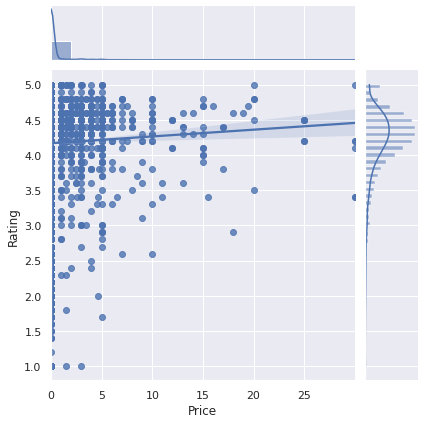

In [ ]:
#a. Make a jointplot (with regression line)
sns.jointplot(x='Price', y='Rating', data=data, kind='reg')
plt.show()

In [ ]:
#b. What pattern do you see?


Generally on increasing the Price, Rating remains almost constant greater than 4.

In [ ]:
#c. How do you explain the pattern?


Since on increasing the Price, Rating remains almost constant greater than 4. Thus it can be concluded that their is very weak Positive correlation between Rating and Price.

In [ ]:
data.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.158547,0.058076,0.118414,0.031479
Reviews,0.158547,1.000000,0.204667,0.736038,-0.073446
Size,0.058076,0.204667,1.000000,0.190741,-0.001054
Installs,0.118414,0.736038,0.190741,1.000000,-0.110507
Price,0.031479,-0.073446,-0.001054,-0.110507,1.000000


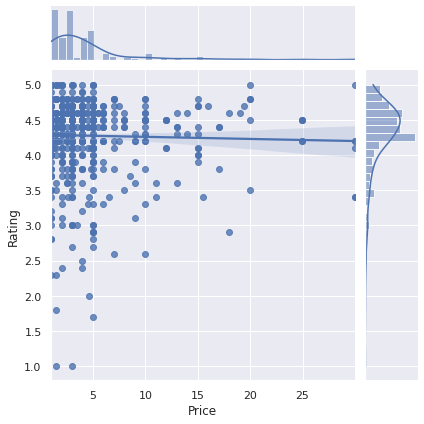

In [ ]:
#d. Replot the data, this time with only records with price > 0
ps1=data.loc[data.Price>0]
sns.jointplot(x='Price', y='Rating', data=ps1, kind='reg')
plt.show()

In [ ]:
#e. Does the pattern change?



Yes, On limiting the record with Price > 0, the overall pattern changed a slight ie their is very weakly Negative Correlation between Price and Rating.

In [ ]:
ps1.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.095986,0.117943,0.063960,-0.025975
Reviews,0.095986,1.000000,0.163959,0.787628,-0.049764
Size,0.117943,0.163959,1.000000,0.119255,0.024912
Installs,0.063960,0.787628,0.119255,1.000000,-0.057710
Price,-0.025975,-0.049764,0.024912,-0.057710,1.000000


In [ ]:
#f. What is your overall inference on the effect of price on the rating

Generally increasing the Prices, doesn't have signifcant effect on Higher Rating. For Higher Price, Rating is High and almost constant ie greater than 4

## **9. Look at all the numeric interactions together –**

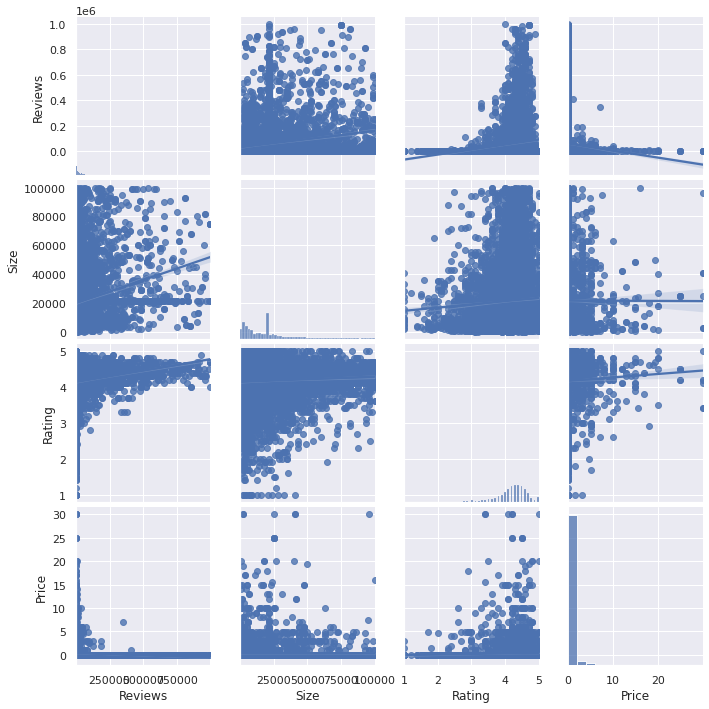

In [ ]:
#a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'
sns.pairplot(data, vars=['Reviews', 'Size', 'Rating', 'Price'], kind='reg')
plt.show()

# **Task 10. Rating vs. content rating**

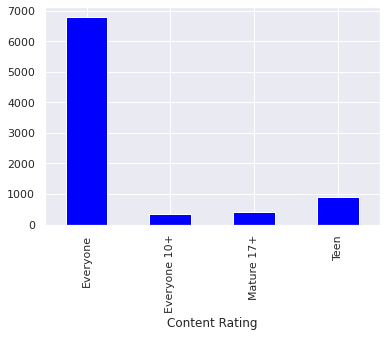

In [ ]:
#a. Make a bar plot displaying the rating for each content rating
data.groupby(['Content Rating'])['Rating'].count().plot.bar(color="blue")
plt.show()

b. Which metric would you use? Mean? Median? Some other quantile?

We must use Median in this case as we are having Outliers in Rating. Because in case of Outliers , median is the best measure of central tendency.

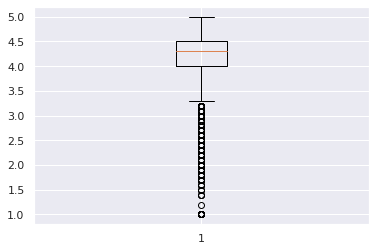

In [ ]:
plt.boxplot(data['Rating'])
plt.show()

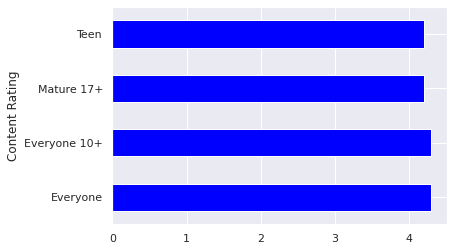

In [ ]:
#c. Choose the right metric and plot
data.groupby(['Content Rating'])['Rating'].median().plot.barh(color="blue")
plt.show()

# **Task 11. Content rating vs. size vs. rating – 3 variables at a time**

In [ ]:
#a. Create 5 buckets (20% records in each) based on Size
bins=[0, 20000, 40000, 60000, 80000, 100000]
data['Bucket Size'] = pd.cut(data['Size'], bins, labels=['0-20k','20k-40k','40k-60k','60k-80k','80k-100k'])
pd.pivot_table(data, values='Rating', index='Bucket Size', columns='Content Rating')

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,4.145730,4.247561,4.010582,4.182240
20k-40k,4.200195,4.169811,4.156291,4.170432
40k-60k,4.167083,4.263636,4.190476,4.237383
60k-80k,4.245408,4.280769,4.200000,4.274194
80k-100k,4.260127,4.304762,4.252632,4.270313


In [ ]:
#b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination
temp3=pd.pivot_table(data, values='Rating', index='Bucket Size', columns='Content Rating', aggfunc=lambda x:np.quantile(x,0.2))
temp3

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,3.80,4.02,3.5,3.9
20k-40k,4.00,4.00,4.0,3.9
40k-60k,3.90,4.06,4.1,4.0
60k-80k,4.00,4.00,4.0,4.0
80k-100k,4.04,4.10,4.0,4.0


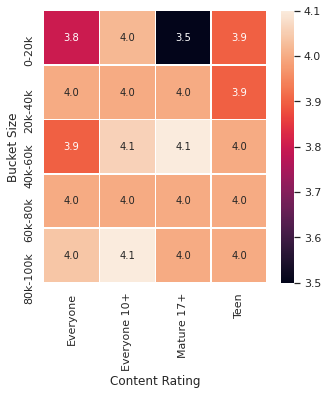

In [ ]:
#c. Make a heatmap of this
#i. Annotated
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(temp3, annot=True, linewidths=.5, fmt='.1f',ax=ax)
plt.show()

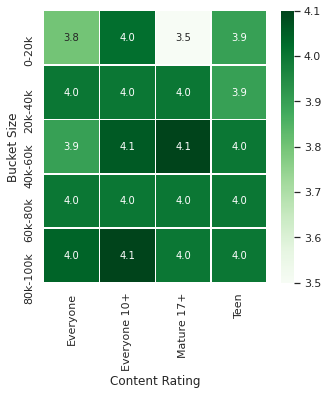

In [ ]:
#ii.Greens color map
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(temp3, annot=True, linewidths=.5,cmap='Greens', fmt='.1f',ax=ax)
plt.show()

In [ ]:
#d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

Based on analysis, its not true that lighter apps are preferred in all categories. Because apps with size 40k-60k and 80k-100k have got the highest rating in all cateegories. So, in general we can conclude that heavier apps are preferred in all categories.
